# An√°lisis Exploratorio inicial

Exploraci√≥n de las primeras tres preguntas del proyecto de pron√≥stico de demanda usando √∫nicamente `pandas` y `matplotlib`.


In [107]:

import pandas as pd 
import matplotlib.pyplot as plt

CSV ="ventas_hiperrealistas.csv"

meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]

#recorre la lista meses asociando un indice (Ene = 1), en donde label es el mes e idx el numero asociado
NumeroMes = {idx + 1: label for idx, label in enumerate(meses)} 
#trabajaremos con series temporales hist√≥ricas para extraer tendencias y estacionalidad antes de modelar.


In [108]:
df = pd.read_csv(CSV, parse_dates=["Date"])


columnas = df.columns.tolist() #lista con los encabezados
rango = (df["Date"].min().date(), df["Date"].max().date())
print(f"Primer y √∫ltimo registro: {rango[0]} a {rango[1]}")
#Primeras 5 filas
print("primeras 5 filas")
df.head()


Primer y √∫ltimo registro: 2012-01-01 a 2020-12-31
primeras 5 filas


TransactionID       Date  ProductID           ProductName ProductCategory  \
0              1 2012-01-01        402       Leche Entera 1L         L√°cteos   
1              2 2012-01-01        103   Pan de Molde Blanco       Panader√≠a   
2              3 2012-01-01        101      Refresco Cola 2L         Bebidas   
3              4 2012-01-01        402       Leche Entera 1L         L√°cteos   
4              5 2012-01-01        401  Yogurt Frutilla 125g         L√°cteos   

   Quantity  UnitPrice  TotalPrice  
0         2        950        1900  
1         1       1800        1800  
2         2       1500        3000  
3         1        950         950  
4         3        400        1200

## Preguntas


## 1. AnaÃÅlisis Exploratorio y VisualizacioÃÅn (15 Puntos)


1. VisioÃÅn Agregada (5 Puntos): Genere un graÃÅfico de series de tiempo que muestre la evolucioÃÅn de la Cantidad total vendida (sumando todos los productos) a lo largo del tiempo. Comente la tendencia general y cualquier patroÃÅn ciÃÅclico o estacional que observe a nivel macro.

En esta secci√≥n, quisimos aplicar adem√°s el m√©todo de medias mo√≠viles para poder visualizar de una froma alisada el comportamiento de los datos y as√≠ detectar de mejor medida patrones c√≠clicos y/o estacionales

Resumen de la serie diaria (unidades):
  Inicio operaciones: 2012-01-01
  Final de operaciones: 2020-12-31
  Promedio diario (unidades): 479.0
  M√°ximo diario (unidades): 2085
  M√≠nimo diario (unidades): 134


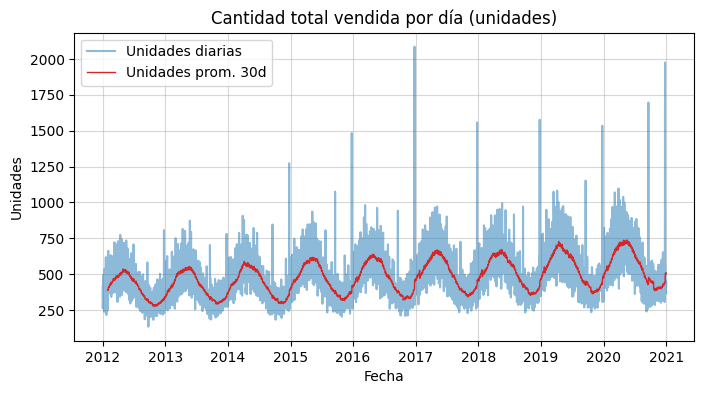

In [109]:

# Series de tiempo: agregamos transacciones a nivel diario (unidades y ventas).

#ordenasmos las ventas diarias, agrupando por fecha y suma de las cantidades vendidas en esa fecha
ventas_diarias = (
    df.groupby('Date')
      .agg(TotalUnidadesDia=('Quantity', 'sum'))
      .reset_index()
      .sort_values('Date')
)

# Medias m√≥viles de 30 d√≠as en unidades y ventas
#PU30: Promedio unidades a 30 dias
#PV30: Promedio Ventas a 30 dias
ventas_diarias['PU30'] = ventas_diarias['TotalUnidadesDia'].rolling(window=30, min_periods=30).mean().shift(1)


#Resumen a grandes rasgos del CSV

resumen_unidades = {
    'Inicio operaciones': ventas_diarias['Date'].min().date(),
    'Final de operaciones': ventas_diarias['Date'].max().date(),
    'Promedio diario (unidades)': round(ventas_diarias['TotalUnidadesDia'].mean(), 0),
    'M√°ximo diario (unidades)': int(ventas_diarias['TotalUnidadesDia'].max()),
    'M√≠nimo diario (unidades)': int(ventas_diarias['TotalUnidadesDia'].min()),
}

print('Resumen de la serie diaria (unidades):')
for i, valor in resumen_unidades.items():
    print(f'  {i}: {valor}')

#Grafica Serie de tiempo con m√©todo medias moviles a 30 dias
#Unidades vendidas
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(ventas_diarias['Date'], ventas_diarias['TotalUnidadesDia'], label='Unidades diarias', alpha=0.5, color='tab:blue')
ax.plot(ventas_diarias['Date'], ventas_diarias['PU30'], label='Unidades prom. 30d', linewidth=1, color='tab:red')
ax.set_title('Cantidad total vendida por d√≠a (unidades)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Unidades')
ax.legend()
ax.grid(alpha=0.5)
plt.show()

/var/folders/d9/2k27_l8j4kdf4z96lty3msz80000gn/T/ipykernel_20488/2506886598.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key="Date", freq="M"))


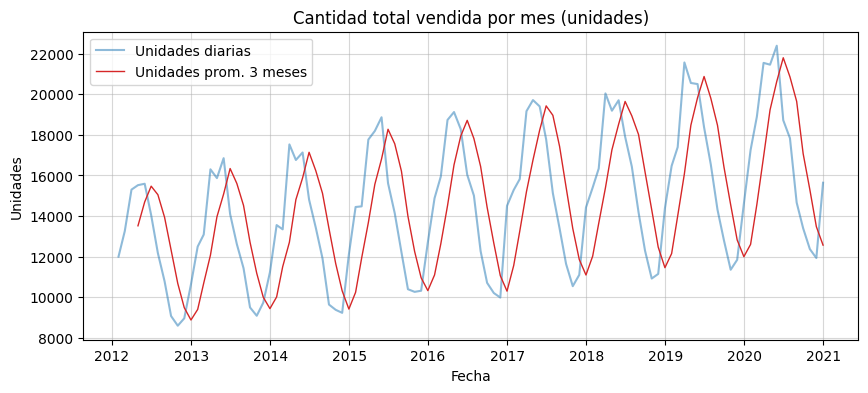

In [110]:
#Gr√°fico del mes a mes
ventas_mensuales = (
    df.groupby(pd.Grouper(key="Date", freq="M"))
      .agg(TotalUnidadesDia=('Quantity', 'sum'),
           TotalVentasDia=('TotalPrice', 'sum'))
      .reset_index()
      .sort_values('Date')
)
#media movil a 3 meses
ventas_mensuales['PU3'] = ventas_mensuales['TotalUnidadesDia'].rolling(window=3, min_periods=3).mean().shift(1)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(ventas_mensuales['Date'], ventas_mensuales['TotalUnidadesDia'], label='Unidades diarias', alpha=0.5, color='tab:blue')
ax.plot(ventas_mensuales['Date'], ventas_mensuales['PU3'], label='Unidades prom. 3 meses', linewidth=1, color='tab:red')
ax.set_title('Cantidad total vendida por mes (unidades)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Unidades')
ax.legend()
ax.grid(alpha=0.5)
plt.show()

Como podemos observar en los graficos, existe precencia de estacionalidad, en donde a nivel anual presentamos el mismo comportamiento en que las ventas suben significativamente hasta una fecha en particular y luego bajan con el mismo o muy similar grado.

2.  DinaÃÅmica de Productos (5 Puntos): Cree un uÃÅnico graÃÅfico que muestre las series de tiempo de la Cantidad vendida para la ‚ÄúLeche Entera 1L‚Äù y el ‚ÄúHelado Chocolate Suizo 1L‚Äù. Compare y contraste visualmente los patrones de demanda de ambos. ¬øSon sus tendencias y volatilidades similares?

/var/folders/d9/2k27_l8j4kdf4z96lty3msz80000gn/T/ipykernel_20488/4031711139.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(key='Date', freq='M'), 'ProductName'])['Quantity']


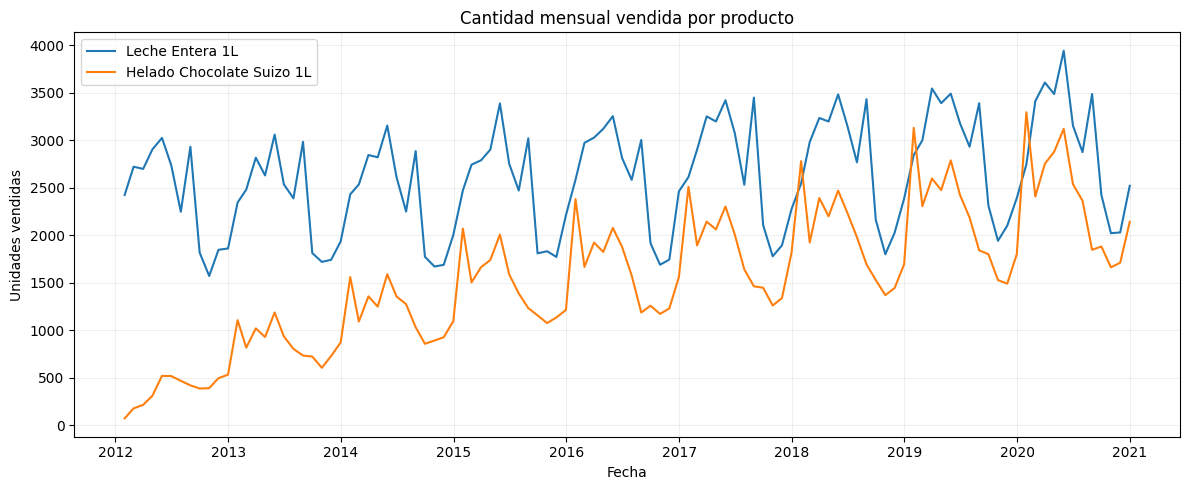

In [111]:
productos= ["Leche Entera 1L", "Helado Chocolate Suizo 1L"]
serie_productos = (
    df[df['ProductName'].isin(productos)]
    .groupby([pd.Grouper(key='Date', freq='M'), 'ProductName'])['Quantity']
    .sum()
    .reset_index()
    .sort_values('Date')
)

helado = serie_productos[serie_productos['ProductName'] == 'Helado Chocolate Suizo 1L']
leche = serie_productos[serie_productos['ProductName'] == 'Leche Entera 1L']

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(leche['Date'], leche['Quantity'], label='Leche Entera 1L')
ax.plot(helado['Date'], helado['Quantity'], label='Helado Chocolate Suizo 1L')

ax.set_title('Cantidad mensual vendida por producto')
ax.set_xlabel('Fecha')
ax.set_ylabel('Unidades vendidas')
ax.legend()
ax.grid(alpha=0.2)
plt.tight_layout()


Conclusiones:
Las ventas de leche mantienen volumenes altos y relativamente estables, en donde, si vemos de forma anual, esta suele tener 2 peaks por a√±o, pero en promedio, una gran oscilaci√≥n anual, popr lo que podemos decir que hay estacionalidad, ahora, esta estacionalidad parece ser aditiva, ya que la amplitud de las oscilaciones no se ve a simple vista un crecimiento significativo a√±o a a√±o. Luego, no se aprecian efectos de tendencia, esta es casi despreciable (constante).

En cuanto a las ventas de helado, podemos ver claramente efectos de tendecia, en donde a comienzos de 2012 posee una demanda baja y a medida que pasan los a√±os, esta demanda va aumentando en promedio de manera aditiva. En cuanto a la estacionalidad, podiramos decir ue lleva una de forma multiplicatica, ya que a√±o a a√±o, posee oscilaciones con una amplitud mayor con el paso del tiempo. Estas oscilaciones parecen tener una correlacion negativa con respecto a las de la leche, pues, cuando la leche alcanza un peak, el helado alcanza un valle.

En cuanto a volatilidad, aparentemente el helado es m√°s volatil, debido a su incremento en los ultimos a√±os y que los peaks y valles de este, se forman de manera m√°s abrupa a comparaci√≥n de la Leche


3. AnaÃÅlisis de Estacionalidad (5 Puntos): Mediante graÃÅficos de cajas (boxplots), ana- lice la distribucioÃÅn mensual de las ventas para la leche y el helado. ¬øQueÃÅ meses presentan mayor y menor demanda para cada uno? ¬øConfirman los graÃÅficos la hipoÃÅtesis de que el helado es un producto estacional y la leche es estable?

Leche Entera 1L: mayor mediana en Mayo (3387 unidades), menor en Octubre (1778 unidades)
Helado Chocolate Suizo 1L: mayor mediana en Enero (2380 unidades), menor en Octubre (1171 unidades)


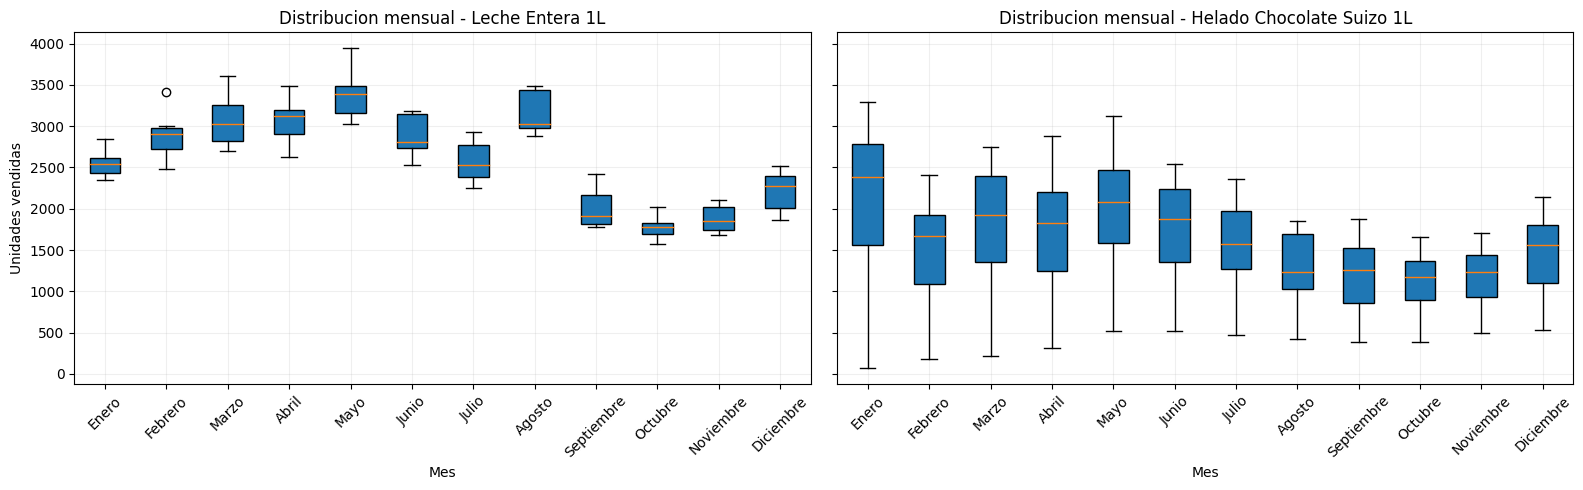

In [112]:

ventas_mensuales_productos= (
    df[df['ProductName'].isin(productos)]
    .groupby([pd.Grouper(key='Date', freq='MS'), 'ProductName'])['Quantity']
    .sum()
    .reset_index()
)

ventas_mensuales_productos['NroMes'] = ventas_mensuales_productos['Date'].dt.month
meses= ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
ventas_mensuales_productos['MesNombre'] = ''
for i, mes in enumerate(meses, start=1):
    filas_mes = ventas_mensuales_productos['NroMes'] == i
    if filas_mes.any():
        ventas_mensuales_productos.loc[filas_mes, 'MesNombre'] = mes

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
for ax, producto in zip(axes, productos):
    datos_producto = ventas_mensuales_productos[ventas_mensuales_productos['ProductName'] == producto]
    datos_por_mes = [
        datos_producto.loc[datos_producto['MesNombre'] == mes, 'Quantity'].values
        for mes in meses
    ]
    ax.boxplot(datos_por_mes, labels=meses, patch_artist=True)
    ax.set_title(f'Distribucion mensual - {producto}')
    ax.set_xlabel('Mes')
    if ax is axes[0]:
        ax.set_ylabel('Unidades vendidas')
    else:
        ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(alpha=0.2)

plt.tight_layout()

resumen_medianas = (
    ventas_mensuales_productos
    .groupby(['ProductName', 'MesNombre'])['Quantity']
    .median()
    .unstack()
    .reindex(columns=meses)
)
for producto in productos:
    serie = resumen_medianas.loc[producto]
    mes_max = serie.idxmax()
    mes_min = serie.idxmin()
    print(f"{producto}: mayor mediana en {mes_max} ({serie.max():.0f} unidades), menor en {mes_min} ({serie.min():.0f} unidades)")



Conclusiones:
Como podemos ver, en el boxplot de la leche, se observa una disperci√≥n poco variable,  las cajas m√°s comprimidas significa que posee ventas m√°s estables, las medianas dicen adem√°s que sus ventas suben hasta mediado de a√±o y luego vuelven a bajar.

En cuanto al helado Las cajas son m√°s altas y los bigotes m√°s largos Por lo que existe una gran variabilidad de sus ventas, adem√°s los "bigotes" largos que posee implica ventas irregulares y sensibles a factores externos, como es de esperar de un producto como el helado.

Los graficos respaldan que el helado es altamente estacional mientras la leche presenta demanda mas estable y predecible.

## 2. Preparaci√≥n de Datos


1. AgregacioÃÅn Temporal (3 Puntos): Agregue los datos a una frecuencia temporal regular (diaria, semanal o mensual). Justifique la eleccioÃÅn de la frecuencia, considerando el balance entre granularidad y interpretabilidad para productos de retail.


In [113]:
#Dado que en el siguiente item, en donde armamos el modelo, 
# trabajaremos solo con el producto Leche Entera 1L, extraeremos solo la info de ese producto
ventas_leche_mensual = (
    df[df['ProductName'] == "Leche Entera 1L"]
    .set_index('Date')[['Quantity', 'TotalPrice']]
    .resample("M") #frecuencia semanal para entrenar al modelo
    .sum()
    
    .reset_index()
)

print("Ventas de Leche entera primeros 5 meses:")
print(ventas_leche_mensual.head())

Ventas de Leche entera primeros 5 meses:
        Date  Quantity  TotalPrice
0 2012-01-31      2424     2302800
1 2012-02-29      2721     2584950
2 2012-03-31      2698     2563100
3 2012-04-30      2904     2758800
4 2012-05-31      3024     2872800


/var/folders/d9/2k27_l8j4kdf4z96lty3msz80000gn/T/ipykernel_20488/2487885431.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M") #frecuencia semanal para entrenar al modelo


Hasta ahora habiamos trabajado de manera mensual para la visualizaci√≥n exploratia de datos, esto ayud√≥ a visualizar con poco ruido la informaci√≥n y hacer analisis sencillos. Por otro lado, pensamos en utilizar para entrenar al modelo un esquema semanal ya que as√≠ tenemos m√°s datos para entrenar el modelo conservando el patr√≥n estacional, pero considerando el contexto de la base de datos, en donde se venden productos de retail, condiremos seguir trabajando de forma mensual, ya que para efectos de estacionalidad, es m√°s facil comparar un mes del periodo anterior (a√±o anterior) a una semana del periodo anterior, claramente es m√°s significativo un mes para este efecto, por lo que si bien tendremos menos datos para entrenar el modelo, estos datos ser√°n m√°s significativos. Adem√°s, para ventas de retail es m√°s √∫til saber un pron√≥stico del pro√≥ximo mes, que de la pr√≥xima semana, pues as√≠ es m√°s facil planificar ventas, compras e incluso metas.


2. DivisioÃÅn de Muestras (2 Puntos): Segmente su serie de tiempo en un conjunto de entrenamiento (primer 80 % de los datos) y uno de prueba (20 % final). Explique por queÃÅ esta divisioÃÅn es fundamental para una evaluacioÃÅn objetiva del rendimiento del modelo.

In [114]:
cant_registros_mes = len(ventas_leche_mensual)
cant_train_mes = int(cant_registros_mes * 0.8)
ventas_train_mes = ventas_leche_mensual.iloc[:cant_train_mes].copy()
ventas_test_mes = ventas_leche_mensual.iloc[cant_train_mes:].copy()

print(f"En nuestro dataset, tenemos {cant_registros_mes} registros")
print(f"Por lo que usaremos el 80% de ellos para entrenar el modelo, es decir {cant_train_mes} datos")
print(f"El resto ser√° de prueba, es decir {cant_registros_mes - cant_train_mes} datos (√∫ltimo 20%)")

En nuestro dataset, tenemos 108 registros
Por lo que usaremos el 80% de ellos para entrenar el modelo, es decir 86 datos
El resto ser√° de prueba, es decir 22 datos (√∫ltimo 20%)


Utilizar el 80% de los datos para entrenar el modelo permitir√° que este tenga una gran cantidad de informaci√≥n para entender el comportamiento de las ventas. Luego, es necesario dejar un porcentaje restante para poder probar el modelo a ver si este logra predecir los datos reales y poder obtener m√©tricas de accuracy para entender qu√© tanto acierta el modelo.


## 3. Modelamiento y PronoÃÅstico (25 Puntos)

1. JustificacioÃÅn del Modelo (5 Puntos): Describa el modelo de pronoÃÅstico que ha elegido. BasaÃÅndose en los hallazgos del anaÃÅlisis exploratorio (tendencia, estacionalidad), explique por queÃÅ este modelo es adecuado para el producto seleccionado. Explique coÃÅmo determinoÃÅ los paraÃÅmetros clave del modelo.

La leche: El modelo Holt-Winters (alisado exponencial triple aditivo) se justifica porque la serie presenta un patr√≥n estacional claramente repetitivo. Este m√©todo permite modelar la estacionalidad y la variabilidad, a diferencia de los dempas modelos vistos que no tienen una componente de estacionalidad. 

Probaremos este modelo bajo varias configuraciones diferentes para determinar cu√°l se ajusta mejor a los datos. A partir de los gr√°ficos anteriores, suponemos que el modelo aditivo funciona mejor que el multiplicativo para las ventas de leche. En cuanto a la tendencia, se puede observar un leve movimiento ascendente, por lo que para asegurar unn buen ajuste del pron√≥stico, consideraremos tendecia aditiva en vez de nula.

Para construir el modelo de Holt-Winters, primero necesitamos calcular los par√°metros estacionales ùëêùë° para el primer ciclo de datos, es decir, el primer a√±o. Esto se hace dividiendo las ventas de cada mes por el promedio anual. A partir de estos par√°metros, se pueden estimar los par√°metros de nivel ùëÜùë° para los per√≠odos siguientes dividiendo las ventas por el par√°metro estacional correspondiente ùëêùë° del mismo mes o semana del ciclo anterior. El par√°metro de tendencia puede estimarse restando las razones entre las ventas y los par√°metros estacionales de dos per√≠odos diferentes, por ejemplo entre el per√≠odo 12 y el per√≠odo 1. Despu√©s de estas estimaciones iniciales, los par√°metros de los per√≠odos siguientes se calculan utilizando las ecuaciones de Holt-Winters y valores iniciales para los coeficientes de suavizado ùõº, ùõΩ y Œ≥. Los valores iniciales t√≠picos pueden ser (0.1, 0.1, 0.1) o (0.2, 0.1, 0.1). El objetivo del modelo es optimizar estos par√°metros para minimizar los errores de predicci√≥n. Esto es precisamente lo que ocurre al usar la funci√≥n ExponentialSmoothing.

La funci√≥n ExponentialSmoothing en Python, de la biblioteca statsmodels, se utiliza para construir un modelo de Holt-Winters que capta el nivel, la tendencia y la estacionalidad de una serie temporal. Al llamarla con par√°metros como trend, seasonal y seasonal_periods, se define la estructura del modelo. La funci√≥n estima valores como: los coeficientes de suavizado alfa, beta y gamma, que determinan cu√°nto influyen las nuevas observaciones en el nivel, la tendencia y los componentes estacionales estimados, as√≠ como los estados iniciales como el primer nivel, la primera tendencia y el primer ciclo estacional. Una vez ajustado, el modelo produce tanto valores ajustados para el per√≠odo observado como pron√≥sticos para per√≠odos futuros.

Cuando se usa el argumento optimized=True, la funci√≥n selecciona autom√°ticamente los valores de alfa, beta y gamma (y los estados iniciales) que minimizan la suma de los errores cuadr√°ticos de un paso hacia adelante, conocida como SSE (Sum of Squared Errors). Matem√°ticamente, la funci√≥n minimiza:

SSE(Œ∏) = Œ£ (y_t ‚àí ≈∑_t|t‚àí1(Œ∏))¬≤,

donde Œ∏ representa todos los par√°metros del modelo. La optimizaci√≥n combina normalmente una b√∫squeda en cuadr√≠cula gruesa (si use_brute=True) para encontrar buenos puntos de partida, considerando par√°metros dentro de l√≠mites v√°lidos entre 0 y 1.

Minimizar la SSE es equivalente a minimizar el error cuadr√°tico medio (MSE) o la ra√≠z del error cuadr√°tico medio (RMSE), ya que estas medidas difieren solo por un factor constante o una ra√≠z cuadrada. Para un n√∫mero fijo de observaciones n,

MSE = SSE / n y RMSE = ‚àö(SSE / n).

Por lo tanto, los valores de los par√°metros que minimizan la SSE tambi√©n minimizan el RMSE. En otras palabras, el modelo se ajusta de modo que el cuadrado de sus errores de predicci√≥n sea lo m√°s peque√±o posible, y el RMSE que luego calculamos a partir de las predicciones es simplemente una versi√≥n reescalada de la misma funci√≥n objetivo.

2. ImplementacioÃÅn y Entrenamiento (8 Puntos): Implemente el modelo elegido en Python, R o Excel. Entrene el modelo utilizando exclusivamente el conjunto de datos de entrenamiento.

#  Modelo basado sobre los datos en meses

In [115]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing
#from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns



In [116]:
#Primero creamos dos nuevos dataframes que pueden ser utilizados por nuestro modelo de Holt-Winters.
#Estos dataframes est√°n compuestos √∫nicamente por los atributos de fecha (por mes) y cantidad.

y_train_mes = ventas_train_mes.set_index("Date")["Quantity"].asfreq("M", fill_value=0)
y_test_mes  = ventas_test_mes.set_index("Date")["Quantity"].asfreq("M", fill_value=0)

/var/folders/d9/2k27_l8j4kdf4z96lty3msz80000gn/T/ipykernel_20488/3233889747.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_train_mes = ventas_train_mes.set_index("Date")["Quantity"].asfreq("M", fill_value=0)
/var/folders/d9/2k27_l8j4kdf4z96lty3msz80000gn/T/ipykernel_20488/3233889747.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_test_mes  = ventas_test_mes.set_index("Date")["Quantity"].asfreq("M", fill_value=0)


In [117]:
#entrenamos el modelo con datos de entrenamiento
Model1 = ExponentialSmoothing(
    y_train_mes,        #Dataset de entrenamiento
    trend="add",             # Gt, Componente de tendencia, usar None si no hay tendencia
    seasonal="add",          # Componente de estacionalidad ct, use "mul" if seasonality scales with level
    seasonal_periods=12     #cada cuanto hay un periodo ct
).fit(optimized=True, use_brute=True)  # brute grid first helps avoid local minima

print("Par√°metros ajustados:", Model1.params)

Par√°metros ajustados: {'smoothing_level': 0.10862951192570565, 'smoothing_trend': 0.09455970037301735, 'smoothing_seasonal': 0.06972491618701367, 'damping_trend': nan, 'initial_level': 2382.1462699481363, 'initial_trend': -1.395940655914992, 'initial_seasons': array([  -5.52624953,  241.73724957,  429.92136193,  436.67531692,
        735.02321373,  261.5081841 ,  -77.8740676 ,  548.33376908,
       -633.87734303, -805.38908985, -722.26816875, -411.93845657]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


smothing_level hace referencia a nuestro alpha, utilizado en la base de la serie (St). En este caso  0.1110714500185621

smoothing_trend hace referencia a nuestro betha, utilizado en Gt, la componente de tendencia. En este caso: 0.09873017491563299.

smoothing_seasonal hace referencia a nuestro gama, utilizado en ct, la componente de estacionalidad. En este caso: 0.00010000574688345366.

Luego, initial_level, initial_trend vendrian siendo S0 y G0, en este caso 2385.769428203602 y 1.0013880805432596.  


## 3. Evaluaci√≥n Cuantitativa (8 Puntos):


1. Genere un pron√≥stico para el per√≠odo que cubre el conjunto de prueba.

In [118]:
#Generamos el pron√≥stico para el per√≠odo de prueba.
y_pred_1 = Model1.forecast(len(y_test_mes))
y_pred_1.index=y_test_mes.index


2. Calcule al menos tres m√©tricas de error (ej. MSE, MAE, RMSE, MAPE) para su modelo. Presente los resultados en una tabla y comente sobre el rendimiento


In [119]:
#Comparando el valor obtenido con la funci√≥n y con la f√≥rmula expl√≠cita.
#Aseg√∫rate de que las dos series est√©n alineadas y tengan la misma longitud.

n = len(y_test_mes)
mae_manual = (abs(y_test_mes - y_pred_1)).sum() / n

rmse_manual = np.sqrt(((y_test_mes - y_pred_1)**2).sum() / n)

mask = y_test_mes != 0  # para evitar dividir por cero
n_valid = mask.sum()  # observaciones v√°lidas

mape_manual = (abs((y_test_mes[mask] - y_pred_1[mask]) / y_test_mes[mask])).sum() / n_valid * 100


print(f"MAE (manual): {mae_manual:.2f}")
print(f"RMSE (manual): {rmse_manual:.2f}")
print(f"MAPE (manual): {mape_manual:.2f}%")




MAE (manual): 121.11
RMSE (manual): 153.36
MAPE (manual): 4.07%


In [120]:
#Presentaci√≥n de los errores como tabla

error_table = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE'],
    'Value': [mae_manual, rmse_manual, f"{mape_manual:.2f}%"]
})

print(error_table)

  Metric      Value
0    MAE  121.10733
1   RMSE  153.36007
2   MAPE      4.07%


4. Visualizaci√≥n del Pron√≥stico (4 Puntos): Cree un gr√°fico que muestre la serie
de tiempo real (entrenamiento y prueba) y superponga el pron√≥stico generado por su modelo sobre el per√≠odo de prueba.

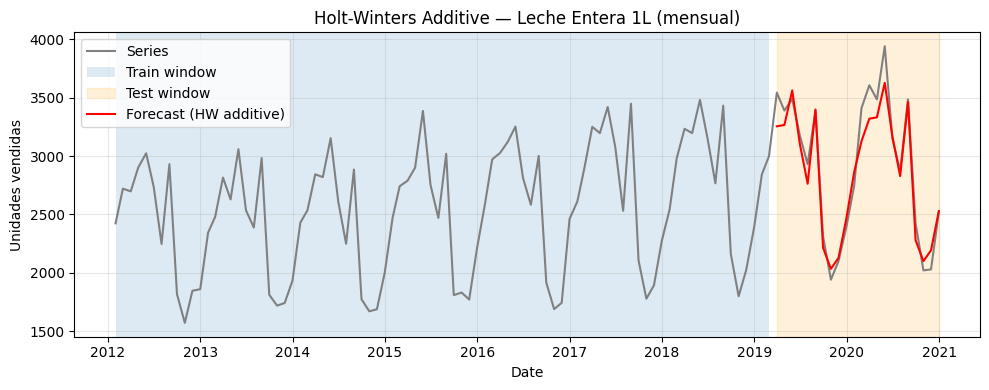

In [121]:
plt.figure(figsize=(10,4))
y_all = pd.concat([y_train_mes, y_test_mes])
plt.plot(y_all.index, y_all, color='gray', label='Series')
plt.axvspan(y_train_mes.index[0], y_train_mes.index[-1], alpha=0.15, label='Train window')
plt.axvspan(y_test_mes.index[0],  y_test_mes.index[-1],  alpha=0.15, color='orange', label='Test window')
plt.plot(y_pred_1.index,  y_pred_1,  label='Forecast (HW additive)', color='red')

plt.title('Holt-Winters Additive ‚Äî Leche Entera 1L (mensual)')
plt.xlabel('Date')
plt.ylabel('Unidades vendidas')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 4. An√°lisis de Negocio y Recomendaciones (15 Puntos)

La etapa final es traducir los resultados t√©cnicos en informaci√≥n accionable para el negocio.


1. Proyecci√≥n a Futuro (5 Puntos): Utilizando su modelo final (re-entrenado con todos
los datos), genere un pron√≥stico de demanda para los pr√≥ximos 12 meses para el producto que model√≥.

In [ ]:
# Re-entrenar el modelo Holt-Winters con todos los datos mensuales y proyectar 12 meses
leche_full = (
    df[df['ProductName'] == "Leche Entera 1L"]
    .set_index('Date')['Quantity']
    .sort_index()
    .resample('ME')
    .sum()
)
leche_full = leche_full.asfreq('ME')

final_hw_model = ExponentialSmoothing(
    leche_full,
    trend='add',
    seasonal='mul',
    seasonal_periods=12
).fit(optimized=True)

forecast_horizon = 12
forecast_values = final_hw_model.forecast(forecast_horizon)
forecast_index = pd.date_range(
    start=leche_full.index[-1] + pd.offsets.MonthEnd(1),
    periods=forecast_horizon,
    freq='ME'
)
forecast_values.index = forecast_index

forecast_df = (
    forecast_values.round(2)
    .rename('Forecast_Quantity')
    .to_frame()
)
forecast_df.index.name = 'Date'

display(forecast_df)


2. Recomendaciones de Inventario (5 Puntos): Bas√°ndose en su pron√≥stico, ¬øqu√© recomendaci√≥n le dar√≠a al gerente de la cadena sobre los niveles de stock de seguridad para la ‚ÄúLeche Entera 1L‚Äù y el ‚ÄúHelado Chocolate Suizo 1L‚Äù a lo largo del a√±o? Sea espec√≠fico (ej. ‚Äúaumentar stock de helado en un X % entre noviembre y febrero‚Äù).


3. Recomendaci√≥n Estrat√©gica (5 Puntos): Si la gerencia quisiera dise√±ar una cam-
pa√±a de marketing para ‚Äúdesestacionalizar‚Äù la venta de helado y aumentar su consumo en los meses de baja demanda, ¬øen qu√© meses sugerir√≠a lanzar una promoci√≥n (ej. ‚Äú2x1 en helados‚Äù)? Justifique con base en su an√°lisis.